In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from flow import Flow
from NeuralFlow.optimizer import DiffusionOptimizer


2024-11-16 14:04:27.048445: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 14:04:27.099662: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def create_base_model(input_shape=1, output_shape=1):
    inputs = tf.keras.Input(shape=(input_shape,))
    x = tf.keras.layers.Dense(512, activation='relu')(inputs)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    outputs = tf.keras.layers.Dense(output_shape, activation='tanh')(x)
    return tf.keras.Model(inputs, outputs)


In [3]:
base_model = create_base_model()

In [ ]:
flowpt = DiffusionOptimizer(
    optimizer_name = "adam", 
    learning_rate = 0.01, 
    noise_stddev = 0.01, 
    memory_epochs = [2, 5]
)

base_model.compile(optimizer=flowpt, loss = 'mse', metrics = ["mae"])

In [5]:
X_train = tf.cast(np.linspace(0, 1, 1000).reshape(-1, 1), tf.float32)
y_train = tf.cast(np.sin(X_train * 2 * np.pi).reshape(-1, 1), tf.float32)

In [6]:
base_model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2260 - mae: 0.3681
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0933 - mae: 0.2178
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0676 - mae: 0.1867
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0602 - mae: 0.1655
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0507 - mae: 0.1512
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0560 - mae: 0.1637
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0401 - mae: 0.1335
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0420 - mae: 0.1296
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0339 - mae: 0.1401
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mae: 0.0968
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mae: 0.0717
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - mae: 0.0456
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [10]:
memory_before, memory_after = flowpt.get_memory()

print(memory_before)

{}


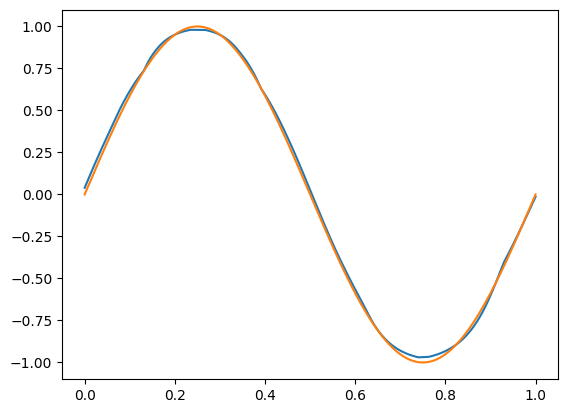

In [8]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(X_train, base_model(X_train))
plt.plot(X_train, y_train)